<a href="https://colab.research.google.com/github/mifm/examples/blob/master/estimating_speedups_from_weibull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git

  Cloning https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git to /tmp/pip-req-build-zuf84rn3
  Running command git clone -q https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git /tmp/pip-req-build-zuf84rn3
  Created wheel for py-wake: filename=py_wake-2.2.0-py3-none-any.whl size=24777040 sha256=d9b79e0ca6284c27999c15b002b95ff15a4d4e900168044adf3f26683bd79fc9
  Stored in directory: /tmp/pip-ephem-wheel-cache-5twcmjhp/wheels/fb/b1/5a/9b9114aac7776bf9de40facb8a0f958449e0a2082c955ca29e
Successfully built py-wake


/usr/local/lib/python3.7/dist-packages/py_wake/utils/xarray_utils.py:150: FutureWarning: xarray subclass DataArrayILK should explicitly define __slots__
  class DataArrayILK(DataArray):


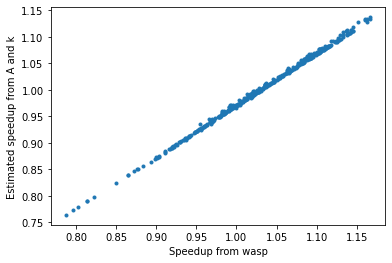

In [2]:
from py_wake.examples.data.ParqueFicticio._parque_ficticio import ParqueFicticioSite
import numpy as np
import matplotlib.pyplot as plt
from py_wake.utils.weibull import mean

site = ParqueFicticioSite()

plt.xlabel('Speedup from wasp')
plt.ylabel('Estimated speedup from A and k')


wsp = mean(site.ds.Weibull_A.values, site.ds.Weibull_k.values)
speedups_from_mean = wsp / wsp.mean((0, 1))
plt.plot(site.ds.Speedup.values[:,:,1,0].ravel(), speedups_from_mean[:,:,1,0].ravel(), '.')